<a href="https://colab.research.google.com/github/onecme/dataMining/blob/main/TI09_ElyasRandiRenaldi_0110223277_PratikumMandiri9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy.stats
from scipy.stats import kstest, shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_excel('/content/drive/MyDrive/dataset/kelulusan_train.xls')
df_test = pd.read_excel('/content/drive/MyDrive/dataset/kelulusan_test.xls')

In [4]:
df_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [5]:
df_test.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


##**Data Cleaning**

In [8]:
print(df_train['JENIS KELAMIN'].unique())
print(df_train['STATUS MAHASISWA'].unique())
print(df_train['STATUS NIKAH'].unique())
print(df_train['STATUS KELULUSAN'].unique())

['PEREMPUAN' 'LAKI - LAKI']
['BEKERJA' 'MAHASISWA']
['BELUM MENIKAH' 'MENIKAH']
['TERLAMBAT' 'TEPAT']


In [9]:
replacements = {
    'JENIS KELAMIN': {'LAKI - LAKI': 1, 'PEREMPUAN': 0},
    'STATUS MAHASISWA': {'MAHASISWA': 1, 'BEKERJA': 0},
    'STATUS NIKAH': {'BELUM MENIKAH': 1, 'MENIKAH': 0},
    'STATUS KELULUSAN': {'TERLAMBAT': 0, 'TEPAT': 1}
}
df_train = df_train.replace(replacements, inplace=False)
df_train.head()

<ipython-input-9-532613c39832>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,0,0,28,1,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,0
1,DWI HESTYNA PRIHASTANTY,0,1,32,1,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,0
2,MURYA ARIEF BASUKI,0,0,29,1,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,0
3,NANIK SUSANTI,0,1,27,1,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,0
4,RIFKA ISTIQFARINA,0,0,29,1,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,0


In [10]:
df_test = df_test.replace(replacements, inplace=False)
df_test.head()

<ipython-input-10-a3912775dc39>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replacements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,1,1,24,1,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,1
1,LEYLA TRIYANA PRATIWI,0,1,26,1,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,1
2,VERIS SOFIYAN PRAYOGA,1,1,29,1,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,1
3,ADITYA AKBAR NUGRAHA,1,1,27,1,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,1
4,ERNA EKA RIYANTI,0,1,25,1,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,1


In [11]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


<Axes: >

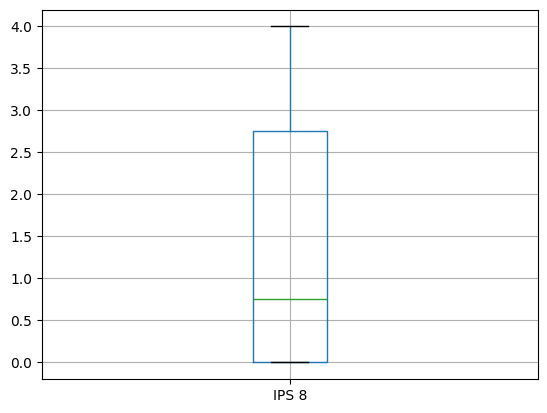

In [12]:
df_train.boxplot(column=['IPS 8'])

<Axes: >

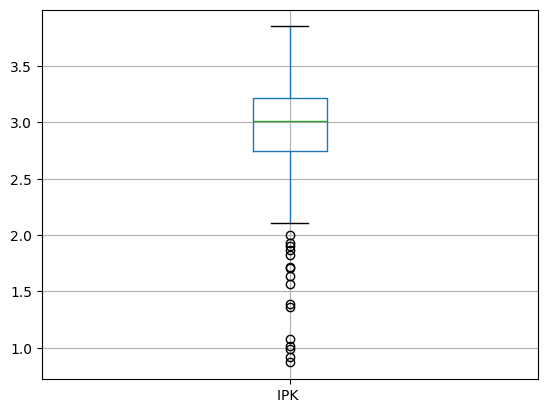

In [13]:
df_train.boxplot(column=['IPK '])

In [14]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


<Axes: >

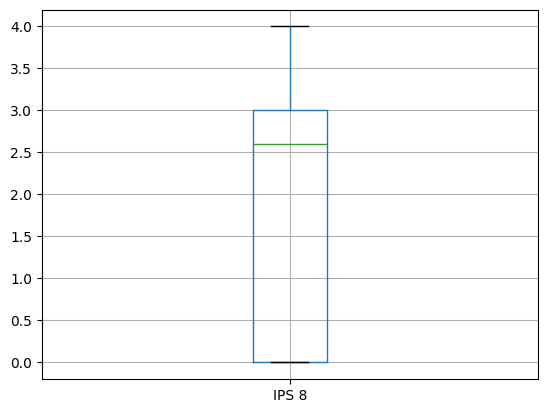

In [15]:
df_test.boxplot(column=['IPS 8'])

<Axes: >

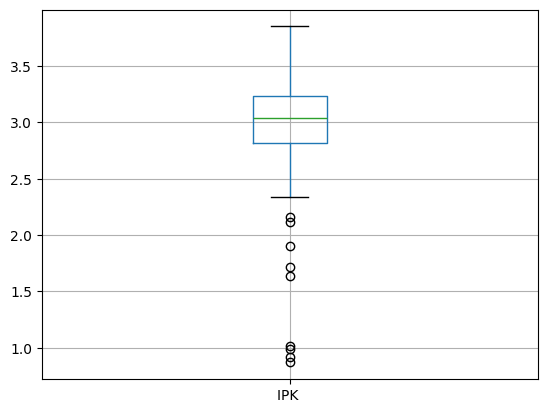

In [16]:
df_test.boxplot(column=['IPK '])

In [17]:
df_train = df_train.dropna(subset=['IPS 8'])
df_train = df_train.dropna(subset=['IPK '])

In [18]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [19]:
df_test = df_test.dropna(subset=['IPS 8'])
df_test = df_test.dropna(subset=['IPK '])

In [20]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


##**Uji Normalitas**

In [21]:
sig_level = 0.05

In [22]:
# Variabel input
jenis_kelamin = 'JENIS KELAMIN'
status_mahasiswa = 'STATUS MAHASISWA'
umur = 'UMUR'
status_nikah = 'STATUS NIKAH'
ips1 = 'IPS 1'
ips2 = 'IPS 2'
ips3 = 'IPS 3'
ips4 = 'IPS 4'
ips5 = 'IPS 5'
ips6 = 'IPS 6'
ips7 = 'IPS 7'
ips8 = 'IPS 8'
ipk = 'IPK '
status_kelulusan = 'STATUS KELULUSAN'

In [23]:
# Uji shapiro wilk
shapiro_jenis_kelamin = shapiro(df_train[jenis_kelamin])
shapiro_status_mahasiswa = shapiro(df_train[status_mahasiswa])
shapiro_umur = shapiro(df_train[umur])
shapiro_status_nikah = shapiro(df_train[status_nikah])
shapiro_ips1 = shapiro(df_train[ips1])
shapiro_ips2 = shapiro(df_train[ips2])
shapiro_ips3 = shapiro(df_train[ips3])
shapiro_ips4 = shapiro(df_train[ips4])
shapiro_ips5 = shapiro(df_train[ips5])
shapiro_ips6 = shapiro(df_train[ips6])
shapiro_ips7 = shapiro(df_train[ips7])
shapiro_ips8 = shapiro(df_train[ips8])
shapiro_status_kelulusan = shapiro(df_train[status_kelulusan])

In [24]:
def shapiro_test(x):

  val = x[1]
  if val > sig_level:
    return 'Normal distribution with a value of ', round(val,2)
  else :
    return 'Non - Normal distribution with a value of ', round(val,2)

In [25]:
print(f'{jenis_kelamin}: {shapiro_test(shapiro_jenis_kelamin)}')
print(f'{status_mahasiswa}: {shapiro_test(shapiro_status_mahasiswa)}')
print(f'{umur}: {shapiro_test(shapiro_umur)}')
print(f'{status_nikah}: {shapiro_test(shapiro_status_nikah)}')
print(f'{ips1}: {shapiro_test(shapiro_ips1)}')
print(f'{ips2}: {shapiro_test(shapiro_ips2)}')
print(f'{ips3}: {shapiro_test(shapiro_ips3)}')
print(f'{ips4}: {shapiro_test(shapiro_ips4)}')
print(f'{ips5}: {shapiro_test(shapiro_ips5)}')
print(f'{ips6}: {shapiro_test(shapiro_ips6)}')
print(f'{ips7}: {shapiro_test(shapiro_ips7)}')
print(f'{ips8}: {shapiro_test(shapiro_ips8)}')
print(f'{status_kelulusan}: {shapiro_test(shapiro_status_kelulusan)}')

JENIS KELAMIN: ('Non - Normal distribution with a value of ', 0.0)
STATUS MAHASISWA: ('Non - Normal distribution with a value of ', 0.0)
UMUR: ('Non - Normal distribution with a value of ', 0.0)
STATUS NIKAH: ('Non - Normal distribution with a value of ', 0.0)
IPS 1: ('Non - Normal distribution with a value of ', 0.0)
IPS 2: ('Non - Normal distribution with a value of ', 0.0)
IPS 3: ('Non - Normal distribution with a value of ', 0.0)
IPS 4: ('Non - Normal distribution with a value of ', 0.0)
IPS 5: ('Non - Normal distribution with a value of ', 0.0)
IPS 6: ('Non - Normal distribution with a value of ', 0.0)
IPS 7: ('Non - Normal distribution with a value of ', 0.0)
IPS 8: ('Non - Normal distribution with a value of ', 0.0)
STATUS KELULUSAN: ('Non - Normal distribution with a value of ', 0.0)


##**Korelasi Spearman**

In [26]:
# Kolom yang ingin digunakan untuk korelasi
df_train = df_train.drop(columns=['NAMA'])
df_train.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,0,28,1,2.76,2.8,3.2,3.17,2.98,3.0,3.03,0.0,3.07,0


In [27]:
df_test = df_test.drop(columns=['NAMA'])
df_test.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,1,24,1,3.17,2.7,3.23,2.41,3.0,2.47,1.75,0.0,2.75,1


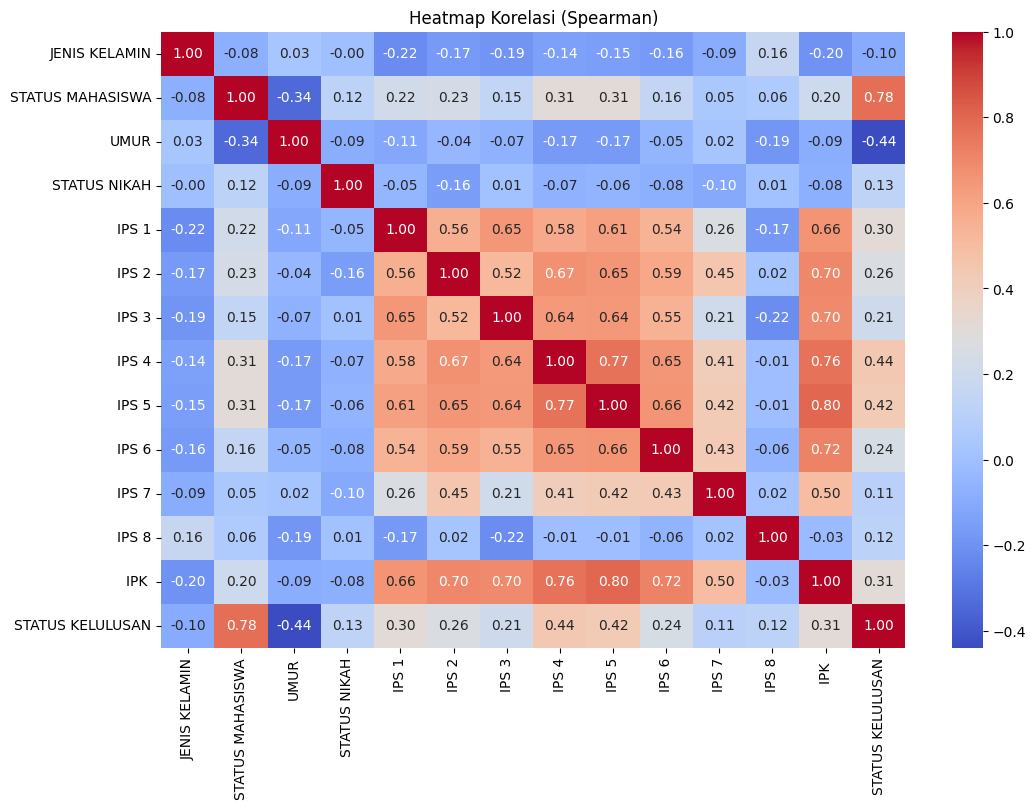

In [28]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df_train.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi (Spearman)")
plt.show()

##**Normalisasi**

In [29]:
scaler = MinMaxScaler()
df_train[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK ']] = scaler.fit_transform(df_train[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK ']])
df_train.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,0,0.214286,1,0.702312,0.664740,0.800000,0.810742,0.755435,0.7500,0.774936,0.0,0.738255,0
1,0,1,0.357143,1,0.771676,0.809249,0.784211,0.803069,0.717391,0.7825,0.831202,0.0,0.771812,0
2,0,0,0.250000,1,0.916185,0.809249,0.931579,0.841432,0.904891,0.9300,0.953964,0.0,0.895973,0
3,0,1,0.178571,1,0.820809,0.841040,0.907895,0.859335,0.891304,0.9075,0.884910,0.0,0.852349,0
4,0,0,0.250000,1,0.742775,0.690751,0.826316,0.728900,0.755435,0.7500,0.787724,0.0,0.744966,0


In [30]:
scaler = MinMaxScaler()
df_test[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK ']] = scaler.fit_transform(df_test[['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8','IPK ']])
df_test.head()

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,1,0.111111,1,0.718750,0.668693,0.807895,0.582173,0.705660,0.588235,0.447570,0.0000,0.630872,1
2,1,1,0.388889,1,0.458333,0.656535,0.728947,0.785515,0.675472,0.635854,0.736573,0.1250,0.651007,1
3,1,1,0.277778,1,0.359375,0.717325,0.507895,0.621170,0.535849,0.577031,0.652174,0.5425,0.654362,1
4,0,1,0.166667,1,0.729167,0.784195,0.828947,0.699164,0.841509,0.661064,0.782609,0.0000,0.744966,1
5,1,1,0.111111,1,0.682292,0.753799,0.792105,0.816156,0.860377,0.759104,0.877238,0.7500,0.791946,1


##**Visualisasi**

<ipython-input-31-43cc78a8845f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')


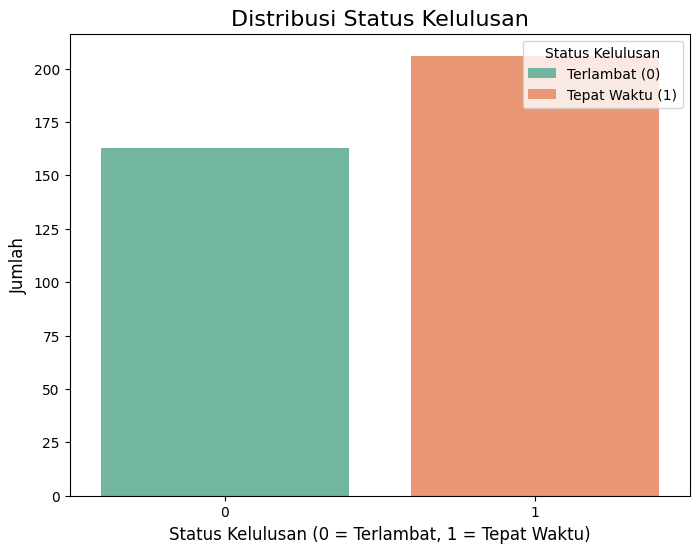

In [31]:
# Membuat diagram batang untuk status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Status Kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan (0 = Terlambat, 1 = Tepat Waktu)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menambahkan legend
plt.legend(title='Status Kelulusan', labels=['Terlambat (0)', 'Tepat Waktu (1)'], loc='upper right')

# Menampilkan plot
plt.show()

##**Modelling**

In [32]:
# data yang dilatih
x_train = df_train.drop(columns=['STATUS KELULUSAN'])
y_train = df_train['STATUS KELULUSAN']

# data validasinya
x_test = df_test.drop(columns=['STATUS KELULUSAN'])
y_test = df_test['STATUS KELULUSAN']

In [33]:
# Membangun model dengan K=5 (Anda bisa memilih K yang lebih optimal)
model = KNeighborsClassifier(n_neighbors=5)

# Melatih model
model.fit(x_train, y_train)

KNeighborsClassifier()

##**Evaluasi**

In [34]:
# Melakukan prediksi
y_pred = model.predict(x_test)

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menghitung dan menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.14      1.00      0.25         2
           1       1.00      0.91      0.95       136

    accuracy                           0.91       138
   macro avg       0.57      0.96      0.60       138
weighted avg       0.99      0.91      0.94       138



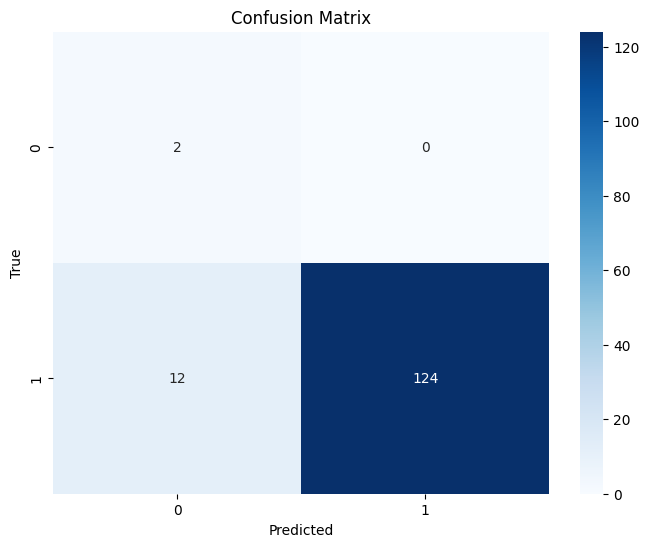

In [35]:
# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

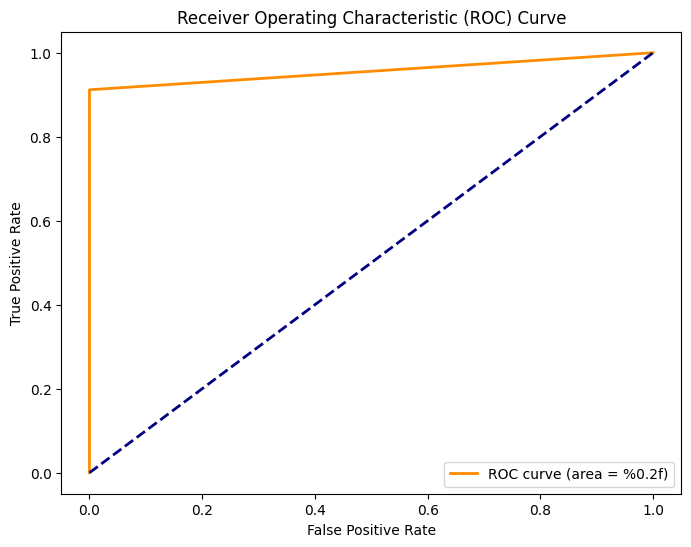

In [36]:
from sklearn.metrics import roc_curve, auc
# Menghitung nilai false porsitive rate (fpr) dan true positeive rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' .format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()